### 统计各个棉种中FLNC的注释情况

+ `samp1.known.gtf`与已有基因注释相匹配
+ `samp1.novel.gtf`与已有基因相匹配但是是新的注释信息
+ `samp1.unrecog.gtf`比对到基因组，但是不是已经注释的基因区域
+ `samp1.detail.txt`比对到基因组区域，有的可能没有被二代read支持

| 基因组 | total  | know_FLNC | novel_FLNC | unrecongnized_FLNC | Other |
| ------ | ------ | --------- | ---------- | ------------------ | ----- |
| TM1    | 241195 | 13865     | 162645     | 23223              | 41462 |
| A2     | 205541 | 13577     | 133663     | 16170              | 42131 |
| D5     | 153149 | 10214     | 105283     | 14798              | 22854 |

准备绘制一个叠加的柱状图

[![aorh5D.png](https://s1.ax1x.com/2020/08/09/aorh5D.png)](https://imgchr.com/i/aorh5D)


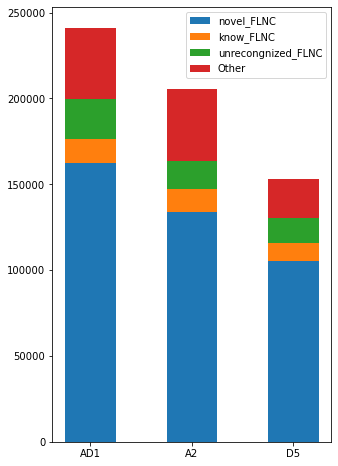

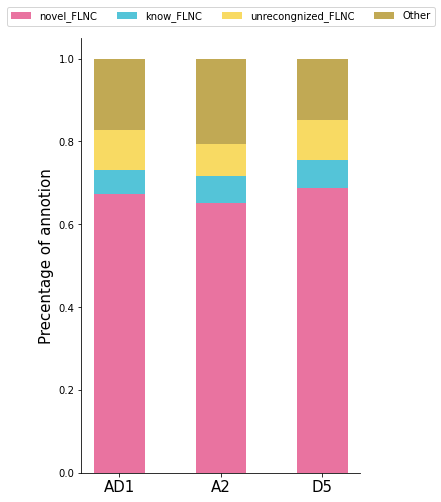

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#%pylab
'''
绘图数据
'''
labels=['AD1','A2','D5',]
know_FLNC=np.array([13865,13577,10214])
novel_FLNC=np.array([162645,133663,105283])
unrecongnized_FLNC=np.array([23223,16170,14798])
Other=[41462,42131,22854]


##生成分组的直方图
fig,ax=plt.subplots(figsize=(5,8)) ##设置图片长宽
barwidth=0.5
#plt.style.use('ggplot')
with plt.style.context('ggplot'):
    ax.bar(labels,novel_FLNC,label="novel_FLNC",width=barwidth)
    ax.bar(labels,know_FLNC,label="know_FLNC",bottom=novel_FLNC,width=barwidth)
    ax.bar(labels,unrecongnized_FLNC,label="unrecongnized_FLNC",bottom=novel_FLNC+know_FLNC,width=barwidth)
    ax.bar(labels,Other,label="Other",bottom=novel_FLNC+know_FLNC+unrecongnized_FLNC,width=barwidth)
ax.legend()


####生成百分比的堆积直方图
fig,ax=plt.subplots(figsize=(5,8)) ##设置图片长宽
total=novel_FLNC+know_FLNC+unrecongnized_FLNC+Other  ##每个分类中总FLNC数目
know_FLNC=np.true_divide(know_FLNC,total)
novel_FLNC=np.true_divide(novel_FLNC,total)
Other=np.true_divide(Other,total)
unrecongnized_FLNC=np.true_divide(unrecongnized_FLNC,total)
with plt.style.context('ggplot'):
    ax.bar(labels,novel_FLNC,
           label="novel_FLNC",
           width=barwidth,
           color="#E973A0"
          )
    ax.bar(labels,know_FLNC,
           label="know_FLNC",
           bottom=novel_FLNC,
           width=barwidth,
           color="#54C4D8"
          )
    ax.bar(labels,
           unrecongnized_FLNC,
           label="unrecongnized_FLNC",
           bottom=novel_FLNC+know_FLNC,
           width=barwidth,
           color="#F8DA63"
          )
    ax.bar(labels,Other,label="Other",
           bottom=novel_FLNC+know_FLNC+unrecongnized_FLNC,
           width=barwidth,
           color="#C1A954"
          )
###隐藏坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Precentage of annotion',size='15')
##设置坐标轴字体大小
ax.set_xticklabels(labels,size="15")
ax.legend(loc="center",bbox_to_anchor=(0.5,1.05),ncol=4,fontsize='10') ##修改图例
fig.savefig('FLNCAnnotion.pdf', dpi=150, bbox_inches="tight")